# Regularización del modelo de regresión lineal

In [1]:
import numpy as np # https://numpy.org/
import pandas as pd # https://pandas.pydata.org/
import seaborn as sns # https://seaborn.pydata.org/
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
%matplotlib inline

In [2]:
# Leer el archivo generado en el notebook de preproceso
df = pd.read_csv('precio_prep_reg.csv', header = 0)

In [3]:
# Crear un nuevo dataframe sin la columna precio (axis=1 -> borra columna)
X_multiple = df.drop('precio', axis = 1)

In [4]:
y_multiple = df['precio']

In [5]:
# Importar el modulo y la función necesaria para el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

### División de los datos en set de entrenamiento y validación

In [6]:
# Importar modulo y función necesaria para hacer una división
# aleatoria de los datos
from sklearn.model_selection import train_test_split

In [7]:
# Obtener los cuatro conjuntos de datos necesarios para el modelo
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size = 0.2, random_state = 123) 

In [8]:
# Revisar las dimensiones de las matrices de los dataframes generados
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((404, 15), (102, 15), (102,), (404,))

In [9]:
linear_model_s = LinearRegression()

In [10]:
linear_model_s.fit(X_train, y_train)

LinearRegression()

In [11]:
# Realizar la predicción en el conjunto de entrenamiento
y_train_s = linear_model_s.predict(X_train)

In [12]:
# Realizar la predicción en el conjunto de validación
y_test_s = linear_model_s.predict(X_test)

In [13]:
# Importar la función que realiza el calculo del RMSE
from sklearn.metrics import r2_score

In [14]:
# Ver la bondad de ajuste en los datos de entrenamiento
r2_score(y_train, y_train_s)

0.7476776519461668

In [15]:
# Ver la bondad de ajuste en los datos de validación
r2_score(y_test, y_test_s)

0.5948163371697065

# Regularización por el método Ridge
Este método penaliza la sumatoria de los parámetros elevados al cuadrado, reduce proporcionalmente los valores de los parámetros del modelo sin que jamás alcancen el valor de cero. El grado de penalización se controla por un hiperparámetro $\lambda$, cuado este es igual a cero no hay penalización al modelo y es equivalente a aplicar el modelo de regresión tradicional, a mayor $\lambda$ la penalización aumenta y disminuyen los valores de los predictores.

$\huge{\sum_{i=1}^{n}(y_{i}-\theta_{0}-\sum_{j=1}^p\theta_{j}x_{ij})+\lambda\sum_{j=1}^p\theta_{j}^2}$

Para el caso de la regularización utilizando gradiente de descenso, la formula queda de la siguiente forma:

$\large{\theta_{j}=(1-\frac{\alpha}{m})-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}}$

In [16]:
# Importar el modulo de preproceso
from sklearn import preprocessing

In [17]:
# Crear un modelo para la normalización de los datos de X_train
escala = preprocessing.StandardScaler().fit(X_train)

In [18]:
# Escalar (normalizar) el conjunto de datos de entrenamiento
X_train_esc = escala.transform(X_train)

In [19]:
X_train_esc

array([[-0.7563966 , -1.2260954 , -1.19901595, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       [ 1.55145024,  0.99548171,  1.58732869, ..., -0.5007734 ,
         2.60177454, -0.76440416],
       [-0.66185639, -1.02871793, -0.39124269, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       ...,
       [-0.49338271, -0.548961  , -0.53748492, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       [ 1.50072639,  0.99548171,  1.24322932, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [ 0.90228673,  0.99548171,  1.39807403, ..., -0.5007734 ,
        -0.38435306,  1.30820847]])

In [20]:
X_train_esc.shape

(404, 15)

In [21]:
# Escalar el conjunto de datos de validación
X_test_esc = escala.transform(X_test)

In [22]:
X_test_esc

array([[ 3.11240444,  0.99548171,  0.35717344, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [-0.73540318, -0.96532662, -0.91599422, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [-0.75574835, -1.13244915, -0.96846938, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       ...,
       [-0.75163044, -1.39321793, -1.30310601, ..., -0.5007734 ,
         2.60177454, -0.76440416],
       [-0.76018979, -0.97973374, -0.97621161, ...,  1.9969112 ,
        -0.38435306, -0.76440416],
       [ 0.87826202,  0.99548171,  0.24534115, ..., -0.5007734 ,
         2.60177454, -0.76440416]])

In [23]:
X_test_esc.shape

(102, 15)

In [24]:
#Importar el modelo de regularización Ridge
from sklearn.linear_model import Ridge

In [25]:
# Ajustar el modelo con un $\lambda=0.5$ (alpha = 0.5 de acuerdo a los parámetros del modelo en Python)
linear_model_r = Ridge(alpha = 0.5)
linear_model_r.fit(X_train_esc, y_train)

Ridge(alpha=0.5)

In [26]:
# Calcular r2 en el conjunto de validación
r2_score(y_test, linear_model_r.predict(X_test_esc))

0.5948831467837294

In [27]:
# Importar el modulo que permite determinar las puntuaciones para diferentes valores de parámetros
from sklearn.model_selection import validation_curve

In [28]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

y : array-like of shape (n_samples,) or (n_samples, n_ou

In [29]:
# Crear 100 números espaciados entre con exponentes entre -2 y -8 para ser transformados
# posteriormente como los lambda de la regularización
rango_parametros = np.logspace(-2,8,100)

In [30]:
rango_parametros

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [31]:
# Determinar puntuaciones para entrenamiento y validación para el parámetro lambda
# (alpha en Python) para los métodos de regularización
train_scores, test_scores = validation_curve(Ridge(), X_train_esc, y_train, "alpha", rango_parametros, scoring = "r2")

d:\jasdata\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [67]:
print(train_scores)
print('__________________________________________________________')
print(test_scores)

[[7.54647949e-01 7.29620882e-01 7.38980119e-01 7.53152328e-01
  7.72162824e-01]
 [7.54647949e-01 7.29620881e-01 7.38980119e-01 7.53152328e-01
  7.72162823e-01]
 [7.54647948e-01 7.29620881e-01 7.38980118e-01 7.53152327e-01
  7.72162823e-01]
 [7.54647947e-01 7.29620880e-01 7.38980117e-01 7.53152325e-01
  7.72162821e-01]
 [7.54647945e-01 7.29620878e-01 7.38980115e-01 7.53152323e-01
  7.72162819e-01]
 [7.54647943e-01 7.29620875e-01 7.38980112e-01 7.53152319e-01
  7.72162815e-01]
 [7.54647938e-01 7.29620870e-01 7.38980108e-01 7.53152313e-01
  7.72162809e-01]
 [7.54647931e-01 7.29620863e-01 7.38980100e-01 7.53152304e-01
  7.72162800e-01]
 [7.54647920e-01 7.29620851e-01 7.38980089e-01 7.53152288e-01
  7.72162786e-01]
 [7.54647903e-01 7.29620833e-01 7.38980070e-01 7.53152264e-01
  7.72162763e-01]
 [7.54647875e-01 7.29620804e-01 7.38980040e-01 7.53152226e-01
  7.72162726e-01]
 [7.54647830e-01 7.29620757e-01 7.38979993e-01 7.53152165e-01
  7.72162667e-01]
 [7.54647760e-01 7.29620682e-01 7.389799

In [69]:
train_scores.shape, test_scores.shape

((100, 5), (100, 5))

In [66]:
# Media de las puntuaciones de entrenamiento
train_media = np.mean(train_scores, axis = 1)

array([7.49712821e-01, 7.49712820e-01, 7.49712819e-01, 7.49712818e-01,
       7.49712816e-01, 7.49712813e-01, 7.49712808e-01, 7.49712800e-01,
       7.49712787e-01, 7.49712766e-01, 7.49712734e-01, 7.49712682e-01,
       7.49712600e-01, 7.49712470e-01, 7.49712262e-01, 7.49711932e-01,
       7.49711409e-01, 7.49710578e-01, 7.49709262e-01, 7.49707178e-01,
       7.49703884e-01, 7.49698687e-01, 7.49690506e-01, 7.49677662e-01,
       7.49657572e-01, 7.49626277e-01, 7.49577782e-01, 7.49503093e-01,
       7.49388909e-01, 7.49215833e-01, 7.48956068e-01, 7.48570490e-01,
       7.48005081e-01, 7.47186660e-01, 7.46017833e-01, 7.44371036e-01,
       7.42081554e-01, 7.38939711e-01, 7.34683118e-01, 7.28991165e-01,
       7.21485314e-01, 7.11739725e-01, 6.99305939e-01, 6.83752164e-01,
       6.64712223e-01, 6.41933768e-01, 6.15313576e-01, 5.84912556e-01,
       5.50953104e-01, 5.13810386e-01, 4.74009199e-01, 4.32227571e-01,
       3.89294130e-01, 3.46160215e-01, 3.03836024e-01, 2.63298175e-01,
      

In [35]:
train_media.shape

(100,)

In [36]:
# Media de las puntuaciones de validación
test_media = np.mean(test_scores, axis = 1)

In [37]:
test_media.shape

(100,)

In [72]:
train_media

array([7.49712821e-01, 7.49712820e-01, 7.49712819e-01, 7.49712818e-01,
       7.49712816e-01, 7.49712813e-01, 7.49712808e-01, 7.49712800e-01,
       7.49712787e-01, 7.49712766e-01, 7.49712734e-01, 7.49712682e-01,
       7.49712600e-01, 7.49712470e-01, 7.49712262e-01, 7.49711932e-01,
       7.49711409e-01, 7.49710578e-01, 7.49709262e-01, 7.49707178e-01,
       7.49703884e-01, 7.49698687e-01, 7.49690506e-01, 7.49677662e-01,
       7.49657572e-01, 7.49626277e-01, 7.49577782e-01, 7.49503093e-01,
       7.49388909e-01, 7.49215833e-01, 7.48956068e-01, 7.48570490e-01,
       7.48005081e-01, 7.47186660e-01, 7.46017833e-01, 7.44371036e-01,
       7.42081554e-01, 7.38939711e-01, 7.34683118e-01, 7.28991165e-01,
       7.21485314e-01, 7.11739725e-01, 6.99305939e-01, 6.83752164e-01,
       6.64712223e-01, 6.41933768e-01, 6.15313576e-01, 5.84912556e-01,
       5.50953104e-01, 5.13810386e-01, 4.74009199e-01, 4.32227571e-01,
       3.89294130e-01, 3.46160215e-01, 3.03836024e-01, 2.63298175e-01,
      

In [39]:
test_media

array([ 7.23489945e-01,  7.23490541e-01,  7.23491293e-01,  7.23492240e-01,
        7.23493436e-01,  7.23494944e-01,  7.23496844e-01,  7.23499240e-01,
        7.23502259e-01,  7.23506063e-01,  7.23510852e-01,  7.23516878e-01,
        7.23524457e-01,  7.23533979e-01,  7.23545929e-01,  7.23560904e-01,
        7.23579636e-01,  7.23603013e-01,  7.23632099e-01,  7.23668154e-01,
        7.23712630e-01,  7.23767155e-01,  7.23833462e-01,  7.23913257e-01,
        7.24007964e-01,  7.24118301e-01,  7.24243610e-01,  7.24380828e-01,
        7.24523006e-01,  7.24657243e-01,  7.24761947e-01,  7.24803369e-01,
        7.24731393e-01,  7.24474646e-01,  7.23934937e-01,  7.22981015e-01,
        7.21441592e-01,  7.19097795e-01,  7.15675873e-01,  7.10842269e-01,
        7.04204676e-01,  6.95323743e-01,  6.83739324e-01,  6.69011679e-01,
        6.50772148e-01,  6.28771941e-01,  6.02916057e-01,  5.73274875e-01,
        5.40077091e-01,  5.03697253e-01,  4.64651191e-01,  4.23601044e-01,
        3.81356328e-01,  

In [40]:
# Ver el valor máximo de las medias de las puntuaciones de validación
max(test_media)

0.7248033685964299

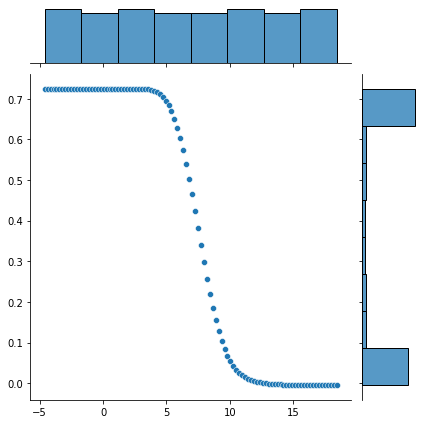

In [41]:
# Realizar la gráfica del rango de parámetros vs la media de las puntuaciones de validación (alpha)
sns.jointplot(x = np.log(rango_parametros), y = test_media)

In [42]:
# Conocer el índice de la puntuación máxima de validación para determinar su correspondiente
# valor de alpha
np.where(test_media==max(test_media))

(array([31], dtype=int64),)

In [43]:
# Valor de alpha que nos permite desarrollar el mejor modelo
rango_parametros[31]

13.530477745798061

In [44]:
# Aplicar el valor de alfa que desarrolla el mejor modelo lineal basado en Ridge
best_linear_model_r = Ridge(alpha = rango_parametros[31])

In [45]:
best_linear_model_r.fit(X_train_esc, y_train)

Ridge(alpha=13.530477745798061)

In [46]:
r2_score(y_test, best_linear_model_r.predict(X_test_esc))

0.5962097565459614

In [47]:
r2_score(y_train, best_linear_model_r.predict(X_train_esc))

0.7469282999061915

# Regularización por el método Lasso
Este método penaliza la sumatoria de los valores absolutos de los parámetros elevados al cuadrado, forza a que los parámetros tiendan a cero. El grado de penalización se controla por un hiperparámetro $\lambda$, cuado este es igual a cero no hay penalización al modelo y es equivalente a aplicar el modelo de regresión tradicional, a mayor $\lambda$ la penalización aumenta y se excluyen predictores.

$\sum_{i=1}^{n}(y_{i}-\theta_{0}-\sum_{j=1}^p\theta_{j}x_{ij})+\lambda\sum_{j=1}^p\|\theta_{j}\|$

In [48]:
from sklearn.linear_model import Lasso

In [49]:
linear_model_l = Lasso(alpha = 0.5)

In [50]:
linear_model_l.fit(X_train_esc, y_train)

Lasso(alpha=0.5)

In [51]:
r2_score(y_test, linear_model_l.predict(X_test_esc))

0.5624557993903527

In [52]:
train_scores_l, test_scores_l = validation_curve(Lasso(), X_train_esc, y_train, "alpha", rango_parametros, scoring = "r2")

d:\jasdata\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [53]:
print(train_scores_l)
print(test_scores_l)

[[0.75461501 0.72959015 0.73894627 0.75311273 0.77211481]
 [0.75459564 0.72957675 0.73892668 0.75309268 0.7720892 ]
 [0.75456481 0.7295554  0.7388949  0.753062   0.77204993]
 [0.75451519 0.72952136 0.73885169 0.75301387 0.77198756]
 [0.75445525 0.72946715 0.73878731 0.75294824 0.77188762]
 [0.75436418 0.7293808  0.73868624 0.7528436  0.77173945]
 [0.75421889 0.72924395 0.73852618 0.752678   0.77158959]
 [0.75401149 0.72902508 0.73827177 0.75242148 0.77139388]
 [0.75368246 0.7286765  0.73786567 0.7521821  0.7710824 ]
 [0.75315706 0.72812137 0.73725278 0.75181279 0.77058655]
 [0.75232037 0.7273072  0.7363441  0.75122488 0.76989144]
 [0.75116749 0.72613609 0.73494506 0.7502891  0.76880631]
 [0.74968444 0.72453905 0.73315396 0.74879829 0.76707742]
 [0.74757207 0.72210795 0.73030125 0.74653929 0.76467489]
 [0.74427911 0.71838435 0.72647319 0.74316966 0.76123998]
 [0.73902932 0.71285207 0.72105677 0.73796146 0.7557702 ]
 [0.73382981 0.70501358 0.71247304 0.7300111  0.74846789]
 [0.72643699 0

In [54]:
train_media_l = np.mean(train_scores_l, axis = 1)

In [55]:
test_media_l = np.mean(test_scores_l, axis = 1)

In [56]:
train_media_l

array([0.7496758 , 0.74965619, 0.74962541, 0.74957793, 0.74950911,
       0.74940285, 0.74925132, 0.74902474, 0.74869782, 0.74818611,
       0.7474176 , 0.74626881, 0.74465063, 0.74223909, 0.73870926,
       0.73333396, 0.72595909, 0.71710918, 0.70846528, 0.70054617,
       0.69149544, 0.67902332, 0.65916303, 0.62754068, 0.57830839,
       0.51144273, 0.41124359, 0.25345836, 0.03784887, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
test_media_l

array([ 0.72454117,  0.72478436,  0.72507545,  0.72543051,  0.72578075,
        0.72618884,  0.72666308,  0.72722164,  0.72771309,  0.72821778,
        0.72860704,  0.72880187,  0.7285182 ,  0.72766825,  0.72520276,
        0.72054037,  0.71444427,  0.70661022,  0.69876144,  0.69192212,
        0.6839456 ,  0.67156844,  0.65171416,  0.61991746,  0.57047921,
        0.50619506,  0.40708813,  0.24857275,  0.03327926, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00

In [58]:
max(test_media_l)

0.7288018681075709

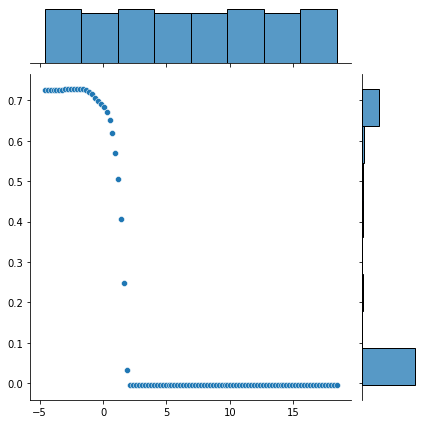

In [59]:
sns.jointplot(x = np.log(rango_parametros), y = test_media_l)

In [60]:
np.where(test_media_l==max(test_media_l))

(array([11], dtype=int64),)

In [61]:
rango_parametros[11]

0.1291549665014884

In [62]:
best_linear_model_l = Lasso(alpha = rango_parametros[11])

In [63]:
best_linear_model_l.fit(X_train_esc, y_train)

Lasso(alpha=0.1291549665014884)

In [64]:
r2_score(y_test, best_linear_model_l.predict(X_test_esc))

0.587320111532413

In [65]:
r2_score(y_train, best_linear_model_l.predict(X_train_esc))

0.7446945770575697